In [1]:
import numpy as np
import pandas as pd
import io
from bokeh.plotting import figure, save,output_file
from bokeh.layouts import widgetbox, row, column, layout
from bokeh.models import ColumnDataSource, Select, Slider,HoverTool,LogColorMapper
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import GMapPlot,Circle, GMapOptions,DataRange1d
from bokeh.io import output_notebook, show, curdoc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read in data
fpath = './data/costco/export_dashboard_cost_2016_06_15_12_24_55.xlsx'
df = pd.read_excel(fpath, sheetname='Country List')
df.head()

,Country,Keyword Repetitions,Latitude,Longitude
0,United States,1663,28.53834,-81.37924
1,United Kingdom,621,53.95800,-1.08300
2,Canada,84,43.70011,-79.41630
3,Jersey,22,49.18804,-2.10491
4,India,21,13.08784,80.27847


In [3]:
# read data in ColumnDataSource
Latitude=df['Latitude']
Longitude=df['Longitude']
Keyword_Repetitions=df['Keyword Repetitions']
Country=df['Country']
source=ColumnDataSource(data=dict(x=Longitude,y=Latitude,Coun=Country,Keyword_Repetitions=Keyword_Repetitions))

/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


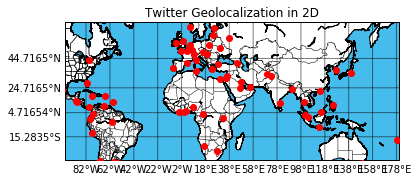

In [4]:
# Twitter Geolocalization in 2D
lat=Latitude.values
lon=Longitude.values

# determine range to print based on min, max lat and long of the data
lat_min=min(lat)+2
lat_max=max(lat)+2
lon_min=min(lon)+2
lon_max=max(lon)+2

# create map using BASEMAP
m=Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,lat_0=(lat_max - lat_min)/2,lon_0=(lon_max-lon_min)/2,
            projection='merc',resolution = 'h',area_thresh=10000)

# draw coastlines
m.drawcoastlines()
# draw country boundaries
m.drawcountries()
# draw states.
m.drawstates()
# draw the boundary of the map 
m.drawmapboundary(fill_color='#46bcec')
# fill continents
m.fillcontinents(color='white',lake_color='#46bcec')

# convert lat and lon to map coordinates
lons,lats=m(lon, lat)
# draw scatte points on the map
m.scatter(lons,lats,color='red',zorder=5)
# draw Longitude axis
m.drawparallels(np.arange(min(lat),max(lat),20),labels=[1])
# draw Latitude axis
m.drawmeridians(np.arange(min(lon),max(lon),20),labels=[1,1,0,1])
plt.title('Twitter Geolocalization in 2D')

plt.show()

/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


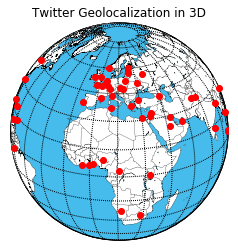

In [5]:
#create map using BASEMAP

#looking down at median(lon,lat)
m2=Basemap(projection='ortho',lat_0=np.median(lat),lon_0=np.median(lon),resolution='l')

# draw coastlines
m2.drawcoastlines(linewidth=0.25)
# draw country boundaries
m2.drawcountries(linewidth=0.25)
# draw the boundary of the map 
m2.drawmapboundary(fill_color='#46bcec')
# fill continent
m2.fillcontinents(color='white',lake_color='#46bcec')

# draw lat/lon grid lines every 15 degrees.
m2.drawmeridians(np.arange(0,360,15))
m2.drawparallels(np.arange(-90,90,15))

# convert lat and lon to map coordinates
lons,lats=m2(lon,lat)
# draw scatte points on the map
m2.scatter(lons, lats,color='red',zorder=5)
plt.title('Twitter Geolocalization in 3D')

plt.show()